In [15]:
import matplotlib.pyplot as plt
import math
import torch
import torch.optim.lr_scheduler as schedulers
from utils import retrieve_setup, retrieve_training_params

In [3]:
model_name = "MobileNetV3Small" 
dataset_name = "CIFAR10"
lr_max = 9.5e-4
lr_min = 3.8e-09
n_epochs = 150

In [16]:
# retrieves
_, dataset = retrieve_setup(model_name, dataset_name)
model = torch.nn.Linear(1, 1)
optimizer, _, loss_fn, _, batch_size = retrieve_training_params(model, dataset_name, "LinearLR","parameters.yml")

# change lr from default to lr_max
for g in optimizer.param_groups:
    g["lr"] = lr_max

# implement linear increasing scheduler
total_iters = math.ceil(len(dataset["train"])/batch_size) * n_epochs
start_factor = lr_min/lr_max

Files already downloaded and verified
Files already downloaded and verified


### FixLR

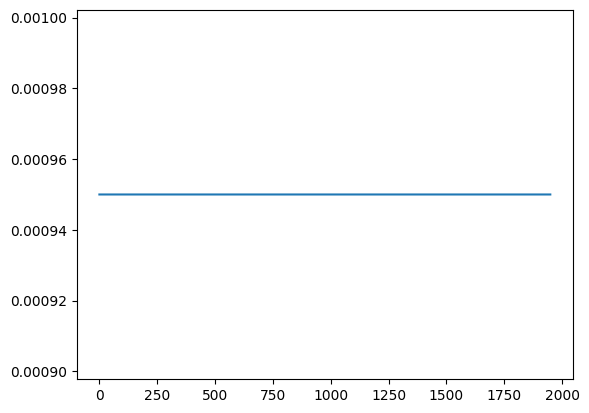

In [17]:
scheduler = schedulers.LambdaLR(optimizer, lr_lambda=lambda _: 1)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### LinearLR

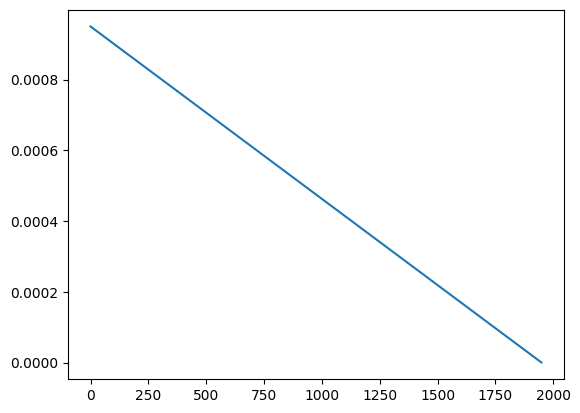

In [18]:
start_factor = 1
end_factor = lr_min/lr_max
scheduler = schedulers.LinearLR(optimizer, start_factor=start_factor, end_factor=end_factor, total_iters=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

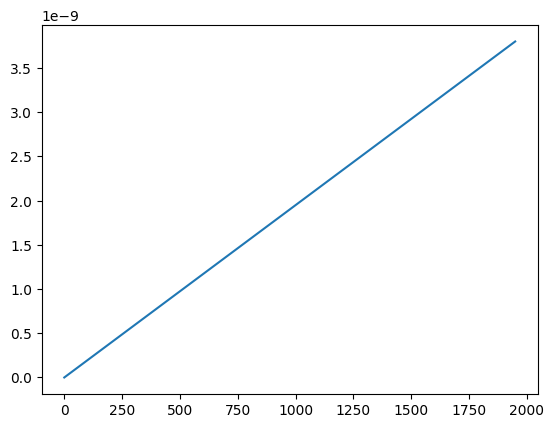

In [19]:
scheduler = schedulers.LinearLR(optimizer, start_factor=end_factor, end_factor=start_factor, total_iters=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### OneCycleLR Scheduler

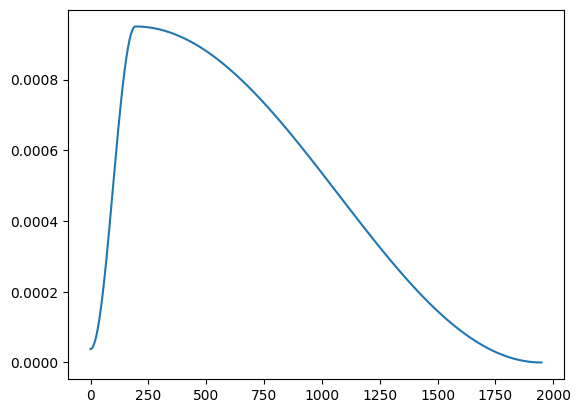

In [20]:
scheduler = schedulers.OneCycleLR(optimizer, max_lr=lr_max, pct_start=0.10, total_steps=total_iters)

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular

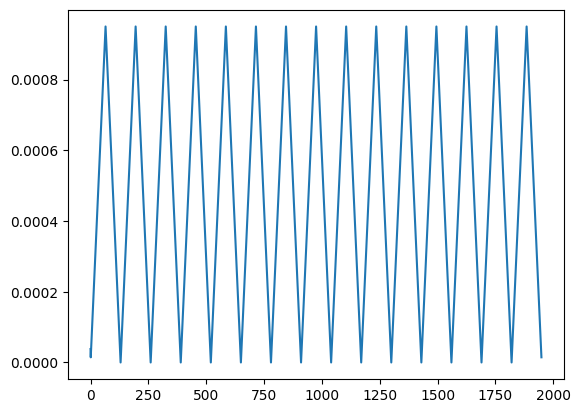

In [21]:
step_size_up = 65
scheduler = schedulers.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=step_size_up, mode="triangular")

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular2

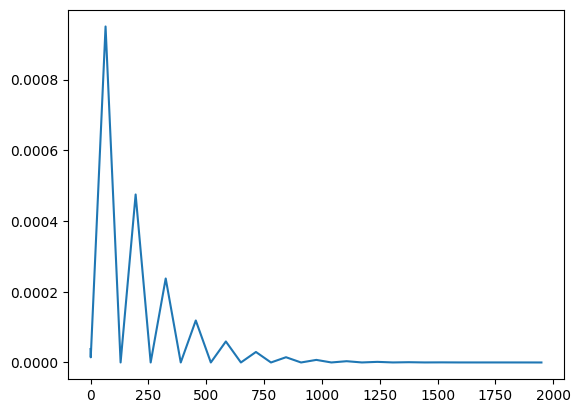

In [23]:
step_size_up = 65
scheduler = schedulers.CyclicLR(optimizer, base_lr=lr_min, max_lr=lr_max, step_size_up=step_size_up, mode="triangular2")

lrs = []
for i in range(total_iters):
    optimizer.step()
    lrs.append(scheduler.get_last_lr()[0])
    scheduler.step()

plt.plot(lrs)